## Introduction to Quantization

### 1. Image Quantization

In [1]:
#we first import all the necessary libraries
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

In [2]:
def cal_scale(x_min, x_max, b):
    return (x_max - x_min ) * 1.0 / (2**b)

In [3]:
def quantize(x, x_min, x_max, b):
    np.clip(x, x_min, x_max, out=x)
    scale = cal_scale(x_min, x_max, b)

    #we use the floor function to convert the 
    #floating point to integer
    q = np.floor((x - x_min) / scale)
    q = np.minimum(q, 2**b - 1)
    return q.astype(np.uint8)

In [4]:
def convert_bytes(size):
    for x in ['bytes', 'KB', 'MB']:
        if size < 1024.0:
            return "%3.1f %s" % (size, x)
        size /= 1024.0
    return size

In [5]:
def save_img(q_img):
    q_img = Image.fromarray(q_img, 'RGB')
    q_img.save("img/q_img.jpg")

In [6]:
def plot_quantized_image(image_path):
    img = mpimg.imread(image_path)
    q_img = mpimg.imread("img/q_img.jpg")
    
    img_size = convert_bytes(os.path.getsize(image_path))
    q_img_size = convert_bytes(os.path.getsize("img/q_img.jpg"))
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 12))
    ax[0].imshow(q_img)
    ax[1].imshow(img)
    
    ax[0].set_title(f"Quantized image b = 8, size {q_img_size}")
    ax[1].set_title(f"Original image, size={img_size}")
    
    ax[0].axison = False
    ax[1].axison = False

In [7]:
image_path = 'img/568500.jpg'
img = (mpimg.imread(image_path)/ 255.0)
b = 8
x_min = np.min(img)
x_max = np.max(img)

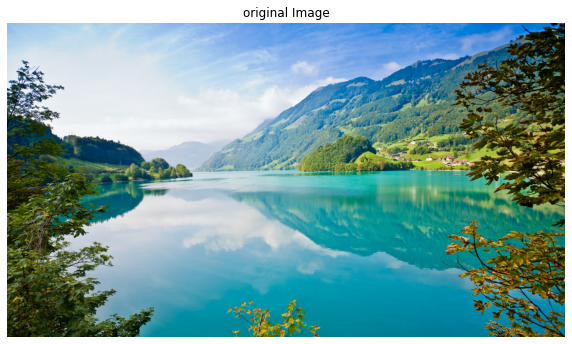

In [8]:
#before perfoming quantization lets see what the image looks like
plt.figure(figsize=(10, 7))
plt.axis('off')
plt.title("original Image")
plt.imshow(img)

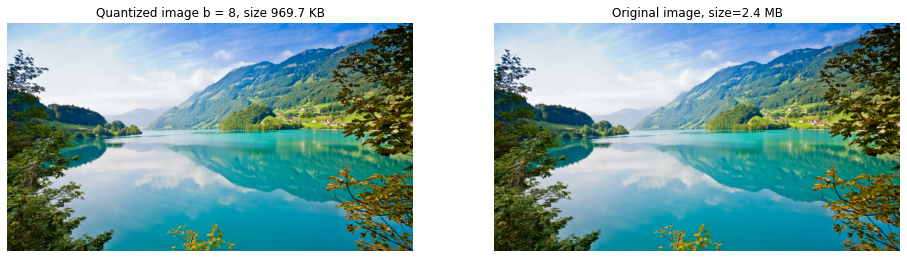

In [9]:
q_img = quantize(img, x_min, x_max, b)
save_img(q_img)
plot_quantized_image(image_path)

In [10]:
def dequantize(q_img, x_min, x_max, b):
    scale = cal_scale(x_min, x_max, b)
    img = x_min + (scale * q_img)
    return img 

In [11]:
img_x = dequantize(q_img, x_min, x_max, b)

In [12]:
loss = np.sum(img - img_x)
print(f"Percentage loss {round((loss/np.sum(img)) * 100, 2)}%")

Percentage loss 0.39%


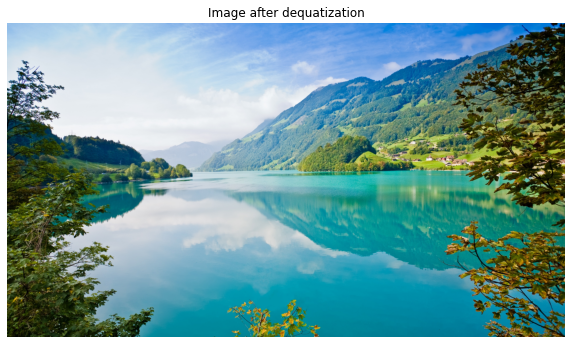

In [13]:
plt.figure(figsize=(10, 7))
plt.axis('off')
plt.title("Image after dequatization")
plt.imshow(img_x)